In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
datadir = "data"
filename = os.path.join(datadir, "data.tsv")
df = pd.read_csv(filename, sep="\t", index_col=0) # read dataframe from csv file
display(df.head(10)) # print dataframe

lmbda  acceptance_ratio     scheme     error
0      1          1.000000   proposal  0.000000
1      2          0.999910   proposal  0.000180
2      3          0.999741   proposal  0.000311
3      4          0.999223   proposal  0.000584
4      5          0.998403   proposal  0.000838
5      6          0.993628   proposal  0.004607
6      7          0.983104   proposal  0.011576
7      8          0.896009   proposal  0.014811
8      1          1.000000  greedy_sc  0.000000
9      2          0.992711  greedy_sc  0.014233

In [8]:
df.groupby("scheme").agg(["mean", "min", "max"])

lmbda         acceptance_ratio                        error  \
           mean min max             mean       min      max      mean   
scheme                                                                  
greedy_sc   4.5   1   8         0.961856  0.864991  1.00000  0.029082   
ilp         4.5   1   8         0.653374  0.337183  0.99882  0.019102   
proposal    4.5   1   8         0.983752  0.896009  1.00000  0.004113   

                               
                min       max  
scheme                         
greedy_sc  0.000000  0.043354  
ilp        0.001185  0.032115  
proposal   0.000000  0.014811

lmbda  acceptance_ratio     scheme     error
8       1          1.000000  greedy_sc  0.000000
9       2          0.992711  greedy_sc  0.014233
10      3          0.983076  greedy_sc  0.024757
11      4          0.976205  greedy_sc  0.031739
12      5          0.968619  greedy_sc  0.037298
13      6          0.959434  greedy_sc  0.041214
14      7          0.949809  greedy_sc  0.043354
15      8          0.864991  greedy_sc  0.040063

lmbda  acceptance_ratio scheme     error
16      1          0.998820    ilp  0.001185
17      2          0.988219    ilp  0.006917
18      3          0.858784    ilp  0.031484
19      4          0.665345    ilp  0.032115
20      5          0.541725    ilp  0.025643
21      6          0.449894    ilp  0.020846
22      7          0.387023    ilp  0.018808
23      8          0.337183    ilp  0.015814

lmbda  acceptance_ratio    scheme     error
0      1          1.000000  proposal  0.000000
1      2          0.999910  proposal  0.000180
2      3          0.999741  proposal  0.000311
3      4          0.999223  proposal  0.000584
4      5          0.998403  proposal  0.000838
5      6          0.993628  proposal  0.004607
6      7          0.983104  proposal  0.011576
7      8          0.896009  proposal  0.014811

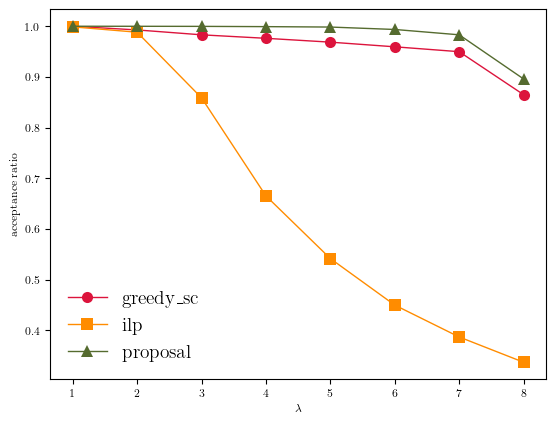

In [9]:
# BAD EXAMPLE
resdir = "fig"
os.makedirs(resdir, exist_ok=True)
schemes = ['greedy_sc', 'ilp', 'proposal']
fig = plt.figure()
ax = fig.add_subplot(111)
for scheme in schemes:
    m = df[(df.scheme == scheme)]
    m.plot(x="lmbda", y="acceptance_ratio", ax=ax, label=scheme)
ax.set_ylabel(r"acceptance ratio", fontsize=8)
ax.set_xlabel(r"$\lambda$", fontsize=8)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
filename = os.path.join(resdir, 'bad_example.pdf')
plt.savefig(filename, bbox_inches='tight', pad_inches=0, transparent=True)

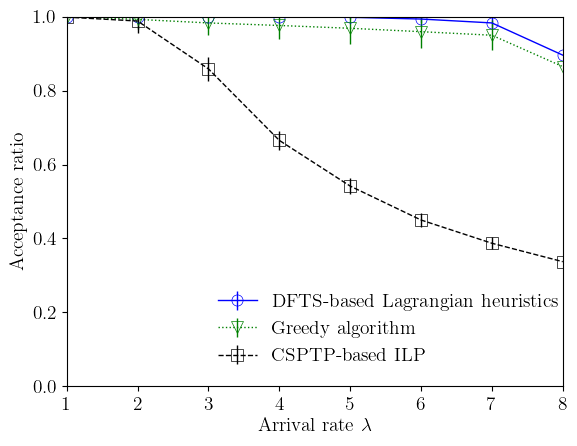

In [12]:
# GOOD EXAMPLE
resdir = "fig"
os.makedirs(resdir, exist_ok=True)
network = 'nsfnet'
schemes = ['proposal', 'greedy_sc', 'ilp']
_scheme = {
    "ilp": "CSPTP-based ILP",
    "greedy_sc": "Greedy algorithm",
    "proposal": "DFTS-based Lagrangian heuristics",

}
markers = {
    "ilp": "s",
    "greedy_sc": "v",
     "proposal": "o",
}
colors = {
    "ilp": "k",
    "greedy_sc": "g",
    "proposal": "b",
}
linestyles = {
    "ilp": "--",
    "greedy_sc": ":",
    "proposal": "-",
}

fig = plt.figure()
ax = fig.add_subplot(111)
for scheme in schemes:
    m = df[(df.scheme == scheme)].reset_index(drop=True)
    e = df[(df.scheme == scheme)][["error"]].reset_index(drop=True)
    m.plot(x="lmbda", y="acceptance_ratio", yerr=e["error"], ax=ax, \
           label=_scheme[scheme], marker=markers[scheme], \
           markerfacecolor='None', markeredgecolor=colors[scheme], markeredgewidth=0.5, \
           color=colors[scheme], linestyle=linestyles[scheme])
ax.set_xlabel(r"Arrival rate $\lambda$")
ax.set_ylabel("Acceptance ratio")
ax.set_xlim(1, 8)
ax.set_ylim(0, 1.0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels, loc="lower center", bbox_to_anchor=(0.65, 0.01))

filename = os.path.join(resdir, 'good_example.pdf')
plt.savefig(filename, bbox_inches='tight', pad_inches=0, transparent=True)

In [13]:
# How to draw a figure with Japanese characters
# 日本語フォントでの表示（和文の原稿での利用を想定）
import matplotlib.font_manager as fm
# 日本語用フォントを利用する場合はusetexの機能をオフ
plt.rc('text', usetex=False)

jp_font = 'ipaexm.ttf'  # IPAexフォント（明朝体）
#jp_font = 'HaranoAjiMincho-Regular.otf'  # 原ノ味フォント

# texliveでインストール済みの日本語フォントを絶対パスで取得
import subprocess
fontpath_encoded = subprocess.check_output("find /usr/local/texlive -name " + jp_font, shell=True)
# バイトにエンコードされているため，デコードし，最後の改行コードを削除
fontpath = fontpath_encoded.decode().strip()
print(fontpath)

# フォントマネージャが利用できるように設定
# fm.fontManager.addfont(fontpath)
# fm.fontManager.ttflist += fm.createFontList([fontpath])
fm.fontManager.addfont(fontpath)

# 日本語用フォントのプロパティを取得
prop = fm.FontProperties(fname=fontpath)
print(prop.get_name())
# 日本語用フォントを指定
plt.rcParams['font.family'] = prop.get_name()
# 数式用フォントをcm (Computer Modern)に指定
plt.rcParams['mathtext.fontset'] = 'cm'

/usr/local/texlive/2022/texmf-dist/fonts/truetype/public/ipaex/ipaexm.ttf
IPAexMincho


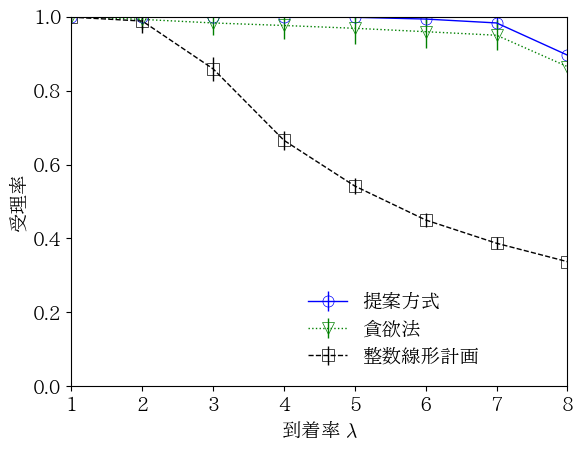

In [24]:
resdir = "fig"
os.makedirs(resdir, exist_ok=True)
network = 'nsfnet'
schemes = ['proposal', 'greedy_sc', 'ilp']
_scheme = {
    "ilp": "整数線形計画",
    "greedy_sc": "貪欲法",
    "proposal": "提案方式",

}
markers = {
    "ilp": "s",
    "greedy_sc": "v",
     "proposal": "o",
}
colors = {
    "ilp": "k",
    "greedy_sc": "g",
    "proposal": "b",
}
linestyles = {
    "ilp": "--",
    "greedy_sc": ":",
    "proposal": "-",
}

fig = plt.figure()
ax = fig.add_subplot(111)
for scheme in schemes:
    m = df[(df.scheme == scheme)].reset_index(drop=True)
    e = df[(df.scheme == scheme)][["error"]].reset_index(drop=True)
    m.plot(x="lmbda", y="acceptance_ratio", yerr=e["error"], ax=ax, \
           label=_scheme[scheme], marker=markers[scheme], \
           markerfacecolor='None', markeredgecolor=colors[scheme], markeredgewidth=0.5, \
           color=colors[scheme], linestyle=linestyles[scheme])
ax.set_xlabel(r"到着率 $\lambda$")
ax.set_ylabel("受理率")
ax.set_xlim(1, 8)
ax.set_ylim(0, 1.0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels, loc="lower center", bbox_to_anchor=(0.65, 0.01))

filename = os.path.join(resdir, 'fig_with_japanese_characters.pdf')
plt.savefig(filename, bbox_inches='tight', pad_inches=0, transparent=True)